In [ ]:
from IPython.display import clear_output

In [ ]:
%pip install torch torchvision torchsummary
%pip install numpy
%pip install matplotlib

clear_output()

In [ ]:
import torch
import numpy as np
import torch.nn as nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torch.utils.data.sampler import SubsetRandomSampler
from torchsummary import summary
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

## Contents

Today we'll attempt to create a number image generator through auto encoders. Here's the technique

1. The model has 2 parts, an encoder and a decoder
2. The encoder takes number image (mnist) and converts it into an embedding/encoding of specified size (output of encoder last layer). by passing it through multiple linear layers.
3. The decoder then takes that encoding and attempts to re-create the original image
4. During training, our cost function is the difference between generated image and original image. we'll use MSE Loss for this
5. Once the training is complete, we'll create our own embeddings of specified size ourselves and run it through the decoder to generate images


Note: In this notebook we'll limit ourselves to Linear Layers or BatchNorm's only (and activations). Which means NO CNN, attention, or anything fancier. For this reason, the performance might be questionable. What we wanna see is the model trying to capture the pattern?

You need to know:

1. **pytorch** (for impelementation)
2. a bit of **torch dataloaders and datasets** (not necessary but helps understanding how we're loading data)
3. A little bit of **matplotlib** (for result and training trajectory visualization)

In [ ]:
batch_size = 64

train_transforms = transforms.Compose([
                        transforms.RandomCrop(28, padding=4),
                        transforms.ToTensor(),
                    ])

train_data = MNIST(root='./datasets', train=True, download=True, transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.04MB/s]


Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.12MB/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



**Task**: Implement Encoder and Decoder

**Encoder**:
  Create a 4-layer network with Linear layers, LeakyReLU() activations, and Batch Normalization (use it in the first Two layer).
  * Fourth layer: Output = dim_z (encoded size), use Tanh activation.


**Decoder**:

Create a 4-layer network with Linear layers and LeakyReLU() activations, and Sigmoid at the output.


* First layer: Input = dim_z
Fourth layer: use the suitable activitation function.

In [ ]:
class AutoEncoderGenerator(nn.Module):

  def __init__(self, dim_z):
    super().__init__()
    self.Encoder = nn.Sequential(

       #to do encoder
      )


    self.Decoder = nn.Sequential(
        #to do decoder
      )

  def forward(self, x):

    original_shape = x.shape
    x = torch.flatten(x, start_dim=1)

    z = self.Encoder(x)
    x = self.Decoder(z)

    x = x.view(original_shape)

    return x


In [ ]:
dim_z = 128
model = AutoEncoderGenerator(dim_z=dim_z)

In [ ]:
summary(model, (1, 28, 28), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #


AttributeError: 'int' object has no attribute 'numpy'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model.to(device)

num_epochs = 20
lr = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
criterion = nn.MSELoss()

In [ ]:
train_losses = []

for i in range(num_epochs):

  epoch_weighted_loss = 0
  for (X, _) in train_loader:

    X = X.to(device)

    Xhat = model(X)  # Xhat because we're trying to have the model regenerate what's fed to it (X)

    #TO DO complete the missing part

    epoch_weighted_loss += loss.item()*len(X)

  epoch_loss = epoch_weighted_loss/len(train_loader.dataset)

  print(f'epoch {i}/{num_epochs}, loss = {epoch_loss}')

  train_losses.append(epoch_loss)

In [ ]:
plt.plot(train_losses)

NameError: name 'train_losses' is not defined

In [ ]:
# Helper function to display results
def display_image_grid(images, num_rows, num_cols, title_text):

    fig = plt.figure(figsize=(num_cols*3., num_rows*3.), )
    grid = ImageGrid(fig, 111, nrows_ncols=(num_rows, num_cols), axes_pad=0.15)

    for ax, im in zip(grid, images):
        ax.imshow(im, cmap="gray")
        ax.axis("off")

    plt.suptitle(title_text, fontsize=20)
    plt.show()

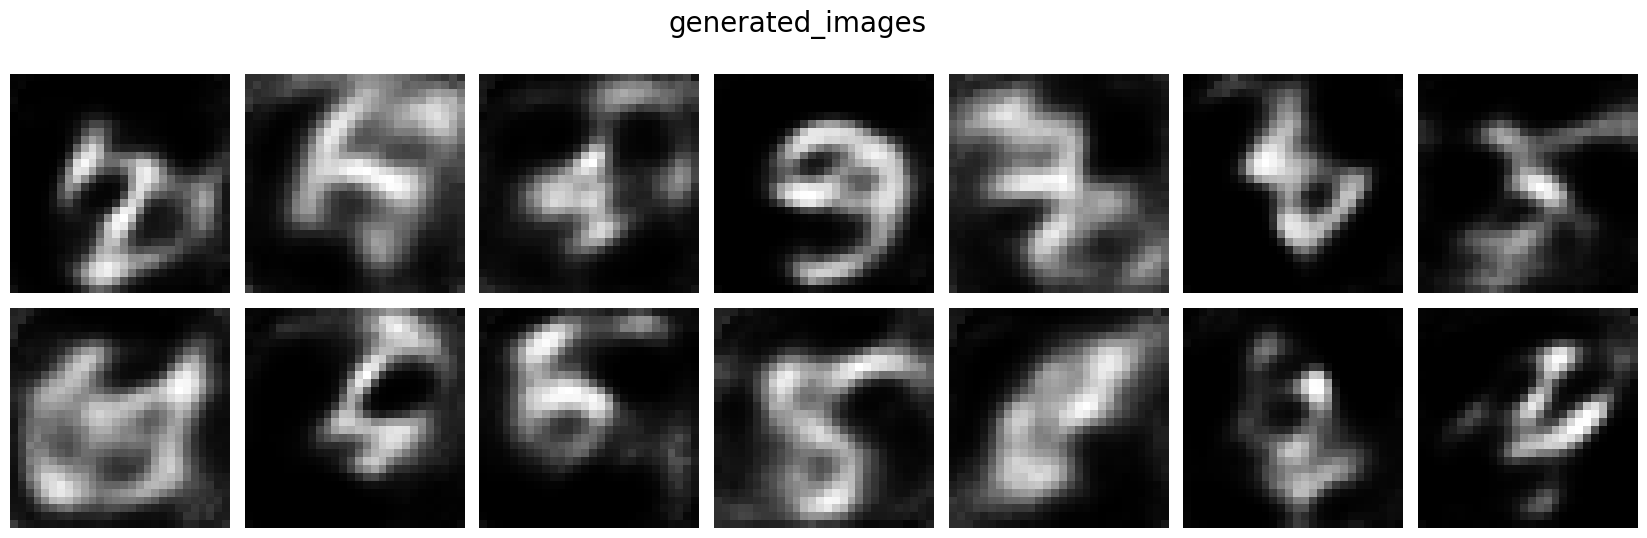

In [ ]:
# Now we will try some actual generation. We will sample the encodings randomly and then pass them through decoder
rows, cols = 2, 7
sample_encodings = (torch.rand(rows*cols, dim_z).to(device) - 0.5) * 2 # encoding space: [-1,1)
with torch.no_grad():
  generations = model.Decoder(sample_encodings).cpu()
  generations = generations.reshape(-1, 28, 28, 1)
display_image_grid(generations, rows, cols, "generated_images")

The images aren't too fancy but we can see it's trying to learn.
In a few images we can also guess the number it's trying to generate